>1 f([4.93443399 5.12768853]) = 6.01636
>2 f([4.9160345  5.03078202]) = 5.98250
>3 f([4.77306308 5.20074711]) = 5.90840
>4 f([4.61648744 5.05843796]) = 5.76124
>5 f([4.61328934 4.97850041]) = 5.74158
>6 f([4.5354485 4.8084356]) = 5.64659
>7 f([4.48185267 4.95698661]) = 5.64000
>13 f([4.40882845 4.86290748]) = 5.56578
>14 f([4.42041797 4.73312001]) = 5.54490
>15 f([4.36558054 4.67820769]) = 5.49236
>16 f([4.28386753 4.69731794]) = 5.43772
>17 f([4.18145223 4.77284397]) = 5.38309
>18 f([4.19827178 4.48172992]) = 5.32571
>19 f([4.19339984 4.4854843 ]) = 5.32311
>22 f([4.12178007 4.4212233 ]) = 5.25671
>27 f([4.16062313 4.28037101]) = 5.25061
>28 f([4.14740525 4.31123251]) = 5.24849
>31 f([3.98583848 4.18536783]) = 5.10286
>33 f([3.93086276 4.22821389]) = 5.07537
>35 f([3.90698403 4.27980037]) = 5.07209
>36 f([3.8863724  4.28482875]) = 5.05934
>37 f([3.84498968 4.3377459 ]) = 5.04510
>39 f([3.74440583 4.19229737]) = 4.94020
>40 f([3.6626425  4.21966407]) = 4.89442
>42 f([3.60089312 4.21790

C:\Users\ymast\AppData\Local\Temp\ipykernel_10364\35058044.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  if diff < 0 or rand() < exp(-diff / t):


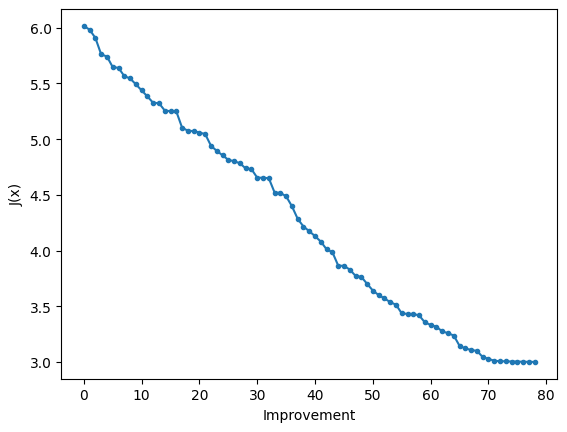

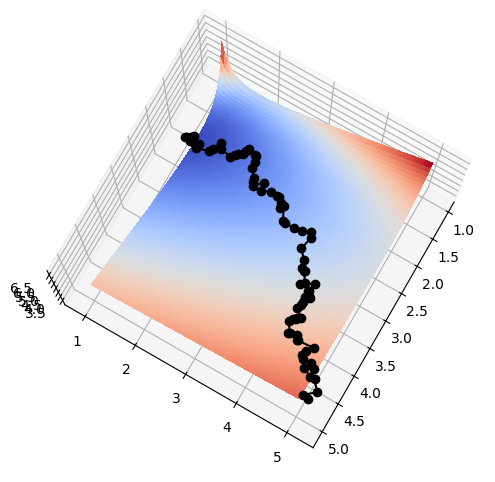

In [3]:
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
xlist=[]
ylist=[]
zlist=[]
xrange = np.linspace(1.1, 5, 100)
yrange = np.linspace(1.1, 5, 100)
X,Y = np.meshgrid(xrange, yrange)

#objective function
def objective(x1,x2):
    return x1+x2**2/(x1*x2-1)

Z = objective(X, Y)

#simulated annealing algorithm
def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
    #generate an initial point
    x_cb = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    x_cb=[5,5]
    #evaluate the initial point
    Jx_cb = objective(x_cb[0],x_cb[1])
    #current working solution
    current, Jcurrent = x_cb, Jx_cb
    scores = list()
    #run the algorithm
    for i in range(n_iterations):
        #calculate temperature for current epoch
        t = temp / float(i + 1)
        #perturb x
        x_per = current + randn(len(bounds)) * step_size
        #evaluate x_per 
        Jx_per = objective(x_per[0],x_per[1])
        #check for new x_cb solution
        if Jx_per < Jx_cb:
            #store new x_cb point
            x_cb, Jx_cb = x_per, Jx_per
            #keep track of scores
            scores.append(Jx_cb)
            xlist.append(x_cb[0])
            ylist.append(x_cb[1])
            zlist.append(Jx_cb)
            #report progress
            print('>%d f(%s) = %.5f' % (i, x_cb, Jx_cb))
        #difference between x_per and current point evaluation
        diff = Jx_per - Jcurrent
        #check if we should keep the new point
        if diff < 0 or rand() < exp(-diff / t):
            #store the new current point
            current, Jcurrent = x_per, Jx_per
    return [x_cb, Jx_cb, scores]

#define range for input
bounds = asarray([[1.1, 5.0],[1.1,5.0]])
#define the total iterations
n_iterations = 1000
#define the maximum step size
step_size = 0.1
# initial temperature
temp = 000
#perform the simulated annealing search
x_cb, score, scores = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('Done!')
print('f(%s) = %f' % (x_cb, score))
# line plot of x_cb scores
plt.plot(scores, '.-')
plt.xlabel('Improvement')
plt.ylabel('J(x)')
plt.show()

fig = plt.figure(figsize=(26,6))

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.plot3D(xlist, ylist,zlist, color="k", marker='o', zorder=10)
ax.view_init(80,30)

4.827551020408163 2.960204081632653 5.486877931680765
4.656921426227515 2.919009748889632 5.33350465593327
4.488285820737893 2.8763337108552762 5.182948215638768
4.321839357385484 2.832087420965806 5.035437462230963
4.157800270983652 2.7861771325829188 4.891219874978229
3.9964126269055384 2.73850414864763 4.750561837920023
3.8379492470165313 2.688965347918685 4.613748317816444
3.682714732649871 2.6374540978579986 4.481081684723513
3.5310484489167067 2.5838616990501264 4.3528793526213825
3.3833272558305856 2.5280795488404664 4.229469856812333
3.2399676650712315 2.470002262429615 4.111186944803036
3.1014269637060266 2.4095320459160843 3.9983612679005156
2.9682026803771855 2.346584672491381 3.8913093680814392
2.8408295893375692 2.281097459931168 3.7903199225470643
2.7198732872675544 2.2130396675392903 3.6956377101154194
2.6059193010703074 2.142425698430032 3.6074465566325165
2.499556792850677 2.0693313758566223 3.5258535881827484
2.401356352302373 1.9939133255544899 3.45087830165524
2.311

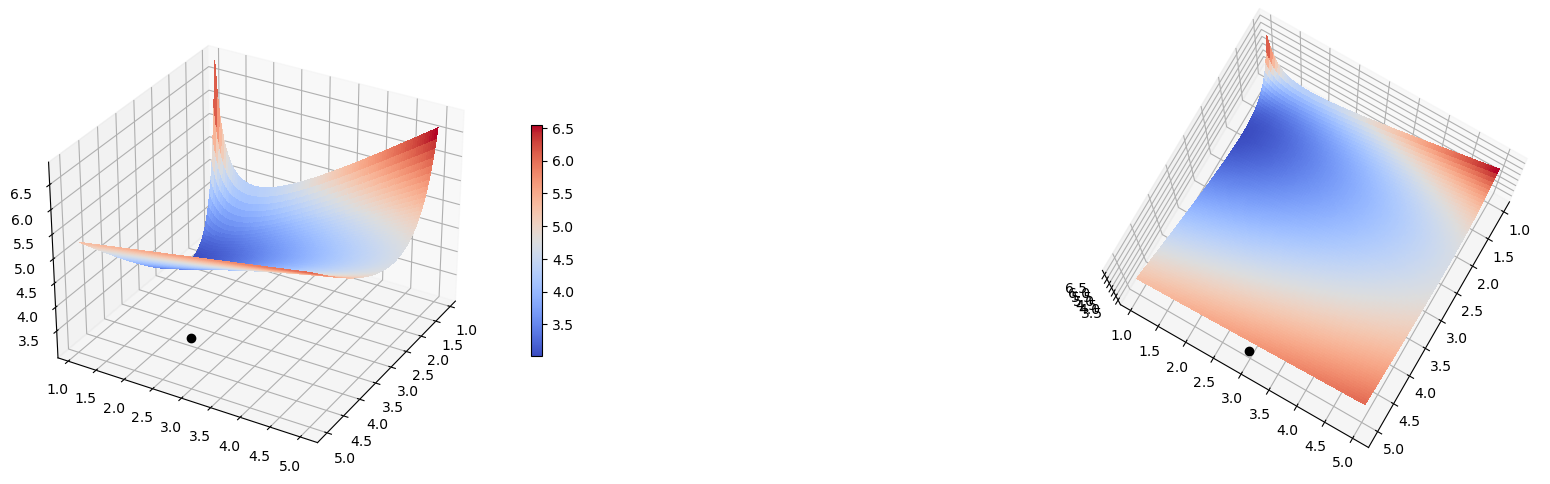

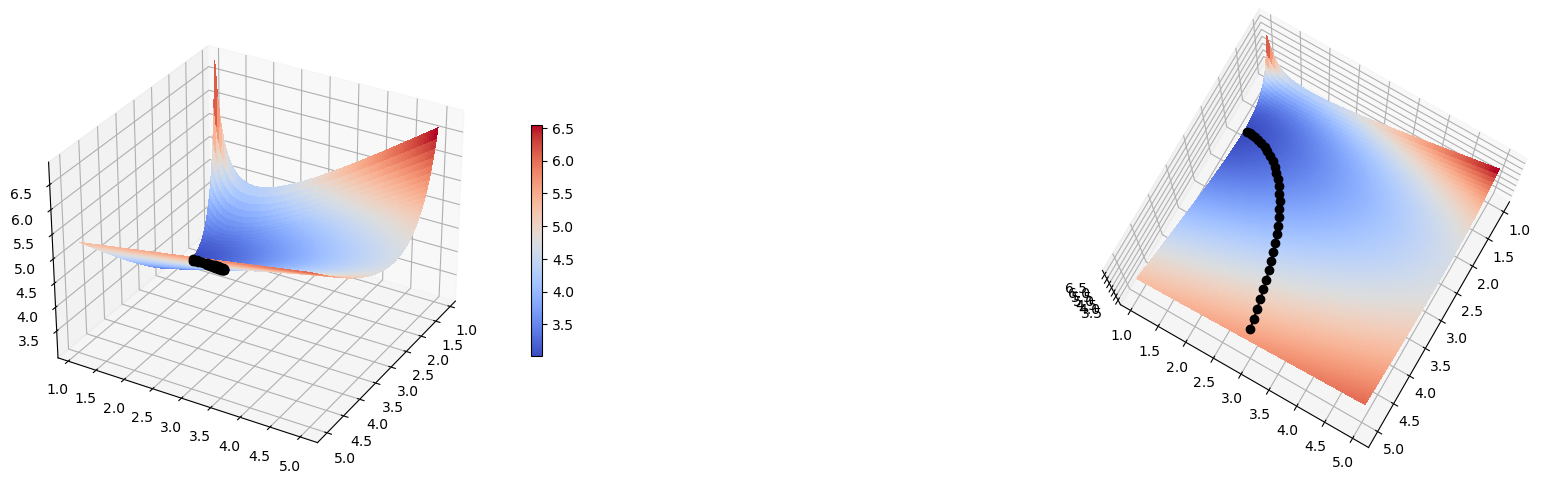

In [1]:
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D

def f(x1,x2):
    return x1+x2**2/(x1*x2-1)
xrange = np.linspace(1.1, 5, 100)
yrange = np.linspace(1.1, 5, 100)
X,Y = np.meshgrid(xrange, yrange)
Z = f(X, Y)

fig = plt.figure(figsize=(26,6))

#surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.plot3D([5], [3],[4], color="k", marker='o', zorder=10)
ax.view_init(30, 30)

cb = fig.colorbar(p, shrink=0.5)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.plot3D([5], [3],[4], color="k", marker='o', zorder=10)
ax.view_init(80, 30)

def dx1(x1,x2):
    return 1- (x2**3)/(x1*x2-1)**2

def dx2(x1,x2):
    return (2*x2*(x1*x2-1)-x1*x2**2)/(x1*x2-1)**2

x1=5
x2=3

xlist=[]
ylist=[]
zlist=[]
alpha=0.2
for step in range (0,30):
    newx1=x1-alpha*(dx1(x1,x2))
    x2=x2-alpha*(dx2(x1,x2))
    x1=newx1
    z=f(x1,x2)
    print(x1,x2,z)
    xlist.append(x1)
    ylist.append(x2)
    zlist.append(z)
    
fig = plt.figure(figsize=(26,6))

#surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.plot3D(xlist, ylist,zlist, color="k", marker='o', zorder=10)
ax.view_init(30,30)

cb = fig.colorbar(p, shrink=0.5)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.plot3D(xlist, ylist,zlist, color="k", marker='o', zorder=10)
ax.view_init(80, 30)
